<a href="https://colab.research.google.com/github/chermont04/Federal-District-Public-heath-Analysis/blob/main/notebooks/Analise_de_internacoes_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook para análise de internações do Brasil do Datasus




# 1.0 Introdução

# 2.0 Importação das Bibliotecas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# 3.0 Carregamento e análise dos dados

Analisando a base de dados, vimos que as primeiras 3 linhas de cabeçário representavam uma introdução e as 12 últimas eram uma descrição das fontes e referências, não seguindo o padrão de dados do arquivo csv e impossibilitando a importação. Para resolver este problema utilizamos as funções:
- skiprows, para remover a introdução dos dados;
- skipfooter, para remover as fontes e referências;
- sep, para identificar o separador de dados como ";";
- encoding, para padronizar a leitura dos dados do arquivo csv.

In [2]:
internacoes = pd.read_csv("https://raw.githubusercontent.com/chermont04/Federal-District-Public-heath-Analysis/main/dados/internacoes_Brasil.csv",
                          encoding = 'ISO-8859-1',
                          skiprows=3,
                          skipfooter=12,
                          sep = ';')
internacoes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Região/Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,Total
0,Região Norte,64708,76756,79237,76243,77815,78283,86726,84462,85064,83727,77357,75254,75629,76545,84877,83666,84052,82082,87871,86417,82304,85681,81883,81646,83935,82200,85459,85457,88344,85459,84637,82228,84099,84412,83661,81283,85246,82110,84474,...,84893,84068,87853,81990,79007,81316,79907,83466,84959,87835,84827,84707,84768,88232,87885,85012,82998,85158,83640,81950,65883,66237,68593,73130,78214,76159,77265,78243,75132,77320,79889,83531,84179,87795,84651,85605,84681,80944,60684,13497257
1,.. Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8356,9008,8498,9657,9972,10051,9763,9070,8821,8347,6246,1457074
2,.. Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381,4310,4002,666513
3,.. Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17559,17762,18028,17727,18696,18005,18744,17958,13409,2373942
4,.. Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929,3519,2985,490682


Verificando os tipos de dados de cada coluna

In [3]:
internacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 168 entries, Região/Unidade da Federação to Total
dtypes: int64(166), object(2)
memory usage: 42.1+ KB


In [4]:
internacoes.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,Total
count,32.000000,32.000000,32.00000,32.0000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,40725.937500,51521.750000,55581.00000,57268.9375,59035.437500,60238.500000,60858.500000,59972.250000,59718.125000,59261.56250,53501.500000,53791.687500,51822.750000,52848.437500,59055.562500,58052.250000,60266.937500,59014.187500,60302.812500,60092.062500,59531.437500,58560.125000,56264.250000,57493.187500,55180.875000,60549.937500,60279.937500,61357.187500,59115.937500,59920.437500,60374.750000,59549.062500,58895.750000,59091.062500,58064.687500,57475.437500,56848.000000,59836.062500,59965.625000,59708.125000,...,63770.562500,61816.500000,62969.000000,60546.06250,58334.250000,61322.687500,59240.750000,62326.000000,63529.937500,66501.062500,63604.562500,65680.687500,66101.625000,64337.125000,65803.875000,62457.187500,60452.375000,62562.187500,60455.437500,59777.062500,48455.562500,49164.000000,49493.562500,53007.750000,53682.375000,54185.500000,56771.06250,56375.750000,54462.500000,56128.062500,55830.000000,58785.250000,58592.875000,60887.312500,61423.062500,60744.000000,60360.250000,58716.812500,53772.937500,9.760196e+06
std,53782.694444,67575.393526,74812.75321,77557.6160,82178.127867,83592.599048,83521.726642,81918.471507,82075.836065,80966.08236,73372.602545,73277.842293,69829.547313,71632.224621,80491.566593,78499.282842,82176.461897,80351.946272,82255.612579,82183.405046,81008.882384,80317.871698,76344.439806,78010.536423,74624.448985,82930.839176,82674.659077,83577.007638,80752.296183,81979.389156,82899.096817,81864.271729,80308.276191,81046.057352,80519.082891,78533.728916,78178.818756,82465.487444,82439.343782,83042.273916,...,88074.333362,84863.132393,87156.292889,83633.68266,81046.000896,85038.467088,81805.343285,86246.545227,88145.138028,92133.437558,87617.624296,90633.263616,91443.071692,88308.054528,90982.971695,85839.640814,82968.286256,86582.886976,82605.119787,81941.272336,65483.577962,67239.748214,68524.898993,74151.806121,73986.551408,75708.915374,78635.51758,78225.834069,75600.443478,77933.866355,76743.719366,81087.670369,79881.789384,83466.960814,83903.291344,83356.380002,82970.207047,80849.162509,76227.559994,1.343103e+07
min,1475.000000,1812.000000,1813.00000,1964.0000,1555.000000,2030.000000,2307.000000,2153.000000,1913.000000,2550.00000,2416.000000,2233.000000,2190.000000,1971.000000,2277.000000,2340.000000,2974.000000,2570.000000,2828.000000,3024.000000,2108.000000,2592.000000,2122.000000,2280.000000,2027.000000,2787.000000,2769.000000,2849.000000,2912.000000,2905.000000,2701.000000,2762.000000,25

Percebemos que na base de dados temos os indicies (de 0 a 31) e a coluna de estados que são do tipo object. Podemos setar a coluna de estados como indice, e remover essa coluna que a função de read_csv seta como indice, ja que ela não será relevante para nenhuma análise.

In [5]:
internacoes = internacoes.set_index('Região/Unidade da Federação')
internacoes.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,64708,76756,79237,76243,77815,78283,86726,84462,85064,83727,77357,75254,75629,76545,84877,83666,84052,82082,87871,86417,82304,85681,81883,81646,83935,82200,85459,85457,88344,85459,84637,82228,84099,84412,83661,81283,85246,82110,84474,85285,...,84893,84068,87853,81990,79007,81316,79907,83466,84959,87835,84827,84707,84768,88232,87885,85012,82998,85158,83640,81950,65883,66237,68593,73130,78214,76159,77265,78243,75132,77320,79889,83531,84179,87795,84651,85605,84681,80944,60684,13497257
.. Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,...,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8356,9008,8498,9657,9972,10051,9763,9070,8821,8347,6246,1457074
.. Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,...,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381,4310,4002,666513
.. Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,...,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17559,17762,18028,17727,18696,18005,18744,17958,13409,2373942
.. Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,...,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929,3519,2985,490682


Podemos observar se há dados nulos para serem tratados

In [6]:
internacoes.isnull().sum()

2008/Jan    0
2008/Fev    0
2008/Mar    0
2008/Abr    0
2008/Mai    0
           ..
2021/Jul    0
2021/Ago    0
2021/Set    0
2021/Out    0
Total       0
Length: 167, dtype: int64

Verificamos que não há valores nulos para serem tratados nesta base de dados.

# 4.0 Limpeza, tratamento e análise exploratória dos dados dos dados

Percebemos que nosso dataset já nos trás o dado compilado por região, para não atrapalhar na visualização por estado, podemos agrupar este dado em uma base separada para análise por região e então remover da base de estados.

In [10]:
#Transpor o DataFrame para poder selecionar as regiões como colunas
internacoes_regiao = internacoes.T
#criar um novo dataFrame com as colunas selecionadas
internacoes_regiao = internacoes_regiao[['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']]
#Remover a coluna de total do dataFrame criado para não sujar a análise
internacoes_regiao = internacoes_regiao.drop('Total')

internacoes_regiao.tail()

Região/Unidade da Federação,Região Norte,Região Nordeste,Região Sudeste,Região Sul,Região Centro-Oeste
2021/Jun,84651,273143,382542,164013,78420
2021/Jul,85605,262280,384607,163798,75614
2021/Ago,84681,253559,384553,168406,74565
2021/Set,80944,248295,373961,165113,71156
2021/Out,60684,221353,354276,158558,65496


Por conta das transformações, o dataFrame mudou de formato, para realizar a análise gráfica, precisamos transforma-lo em tipo numérico antes.

In [22]:
internacoes_regiao[['Região Norte', 'Região Nordeste', 
                    'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']] = internacoes_regiao[['Região Norte', 'Região Nordeste', 'Região Sudeste', 
                                                                                                  'Região Sul', 'Região Centro-Oeste']].apply(pd.to_numeric) 

# 5.0 Análises gráficas

Podemos começar a análise gráfica entendendo como está sendo as internações por região

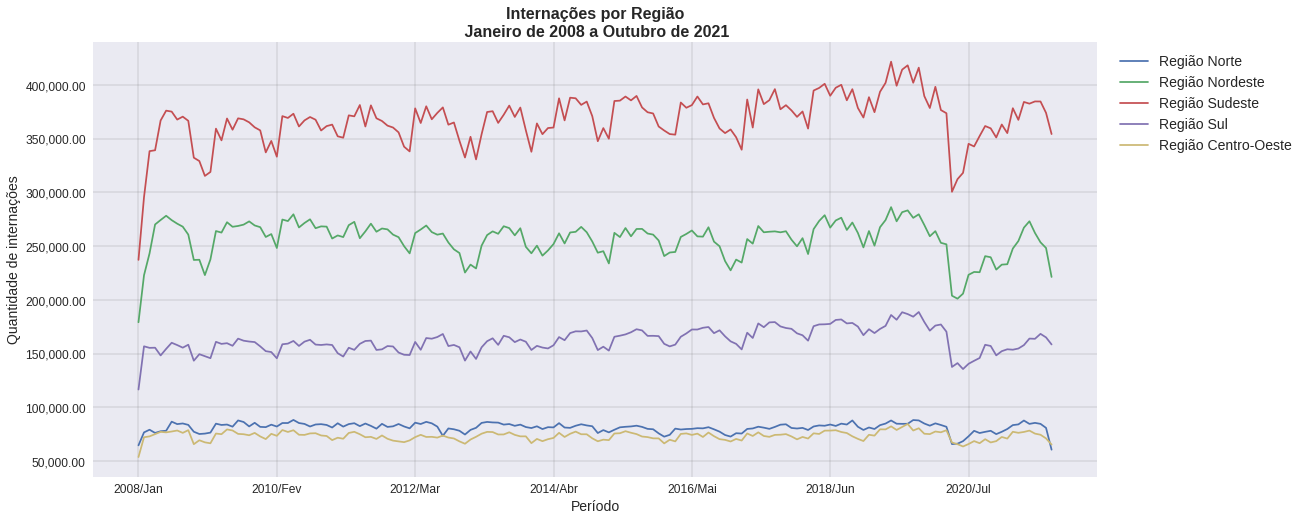

In [57]:
plt.style.use('seaborn')
ax = internacoes_regiao.plot(figsize = (18,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Internações por Região\n Janeiro de 2008 a Outubro de 2021', size = 16, weight='bold')
plt.xlabel('Período', size = 14)
plt.ylabel('Quantidade de internações', size = 14)
plt.legend(bbox_to_anchor=(1.01,1), fontsize = 14, )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(color = 'gray', linewidth = 0.3)

### Conclusões
- Há uma certa sazonalidade nas internações;
- Houve um aumento em todas as regiões em 2020;
- As internações são diretamente proporcionais a população das regiões;

Vamos agora entender a posição do Distrito Federal em relação a quantidade de internações no Brasil.

In [ ]:
internacoes = internacoes.drop(index = ['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste'])

In [ ]:

#internacoes = internacoes.drop('Total', axis = 1)

Vamos começar gerando um gráfico dos dados de internações de cada estado ao longo do tempo para entendermos o comportamento ao longo do tempo e os estados com maiores internações.

# 6.0 Análises

# 7.0 Conclusões

# 8.0 Considerações Finais

# 9.0 Referencias